In [49]:
import numpy as np
import pandas as pd


In [50]:
dataset =pd.read_csv('COVID-19 SL 03-11 to 03-24.csv').values

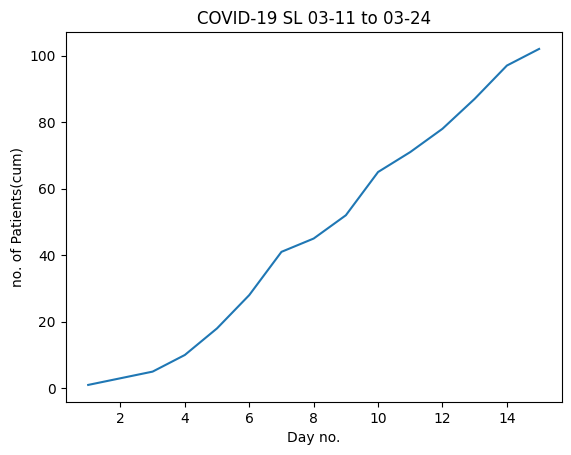

In [51]:
data=dataset[:,0].reshape(-1,1)
target=dataset[:,1].reshape(-1,1)

from matplotlib import pyplot as plt

plt.plot(data,target)
plt.xlabel('Day no.')
plt.ylabel('no. of Patients(cum)')
plt.title('COVID-19 SL 03-11 to 03-24')
plt.show()

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [53]:

poly=PolynomialFeatures(degree=4,include_bias=False)
data_new=poly.fit_transform(data)

In [54]:
algorithm=LinearRegression()
algorithm.fit(data_new,target)

LinearRegression()

In [55]:
print('Coefficients:',algorithm.coef_)
print('Intercept:',algorithm.intercept_)

Coefficients: [[-6.43838447e+00  2.70741170e+00 -1.99026063e-01  5.07786847e-03]]
Intercept: [5.26307026]


In [56]:
from sklearn.metrics import r2_score

In [57]:
predicted_target=algorithm.predict(data_new)

print('r2 score:',r2_score(target,predicted_target))

r2 score: 0.9975413652730774


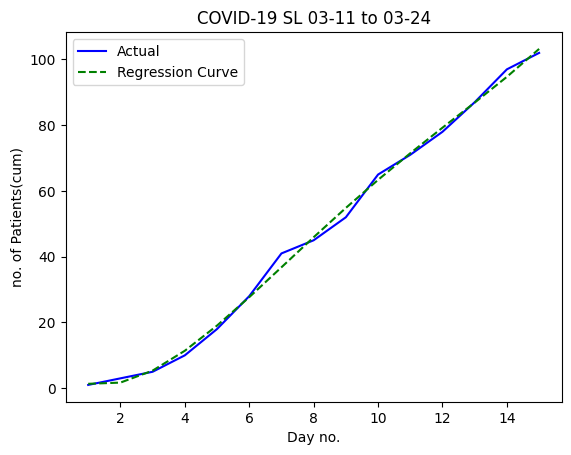

In [58]:
plt.plot(data,target,'b',label='Actual')
plt.plot(data,predicted_target,'g--',label='Regression Curve')
plt.legend()
plt.xlabel('Day no.')
plt.ylabel('no. of Patients(cum)')
plt.title('COVID-19 SL 03-11 to 03-24')
plt.show()

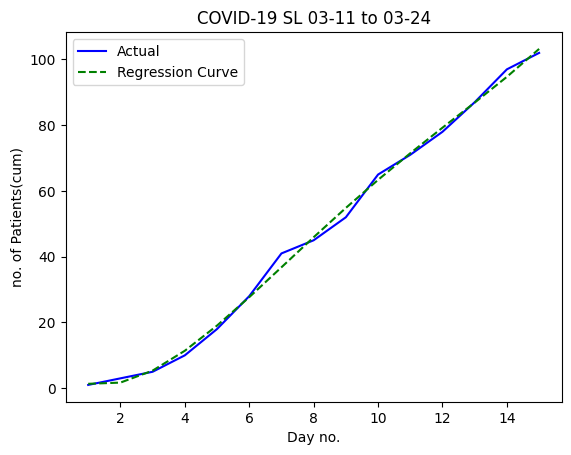

In [59]:
plt.plot(data,target,'b',label='Actual')
plt.plot(data,predicted_target,'g--',label='Regression Curve')
plt.legend()
plt.xlabel('Day no.')
plt.ylabel('no. of Patients(cum)')
plt.title('COVID-19 SL 03-11 to 03-24')
plt.show()

In [60]:
test_data=np.arange(15,26).reshape(-1,1)
test_data_new=poly.fit_transform(test_data)


In [61]:
predicted_target_next_10_days=algorithm.predict(test_data_new)


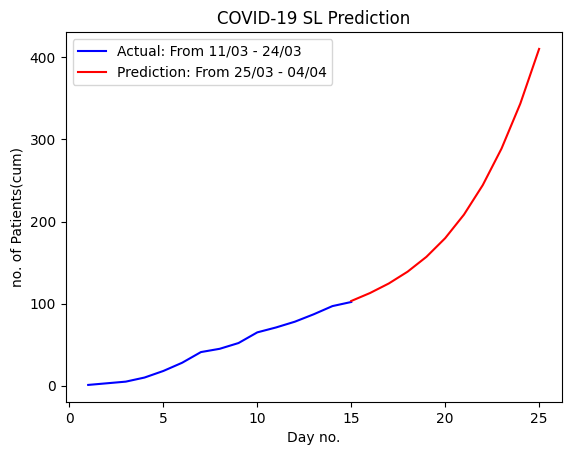

In [62]:
plt.plot(data,target,'b',label='Actual: From 11/03 - 24/03')
plt.plot(test_data,predicted_target_next_10_days,'r',label='Prediction: From 25/03 - 04/04')
plt.legend()
plt.xlabel('Day no.')
plt.ylabel('no. of Patients(cum)')
plt.title('COVID-19 SL Prediction')
plt.show()

In [63]:
predicted_target_next_10_days

array([[103.20906433],
       [112.91874792],
       [124.54612055],
       [138.90786175],
       [156.9425199 ],
       [179.71051223],
       [208.3941248 ],
       [244.29751251],
       [288.84669914],
       [343.58957726],
       [410.19590832]])

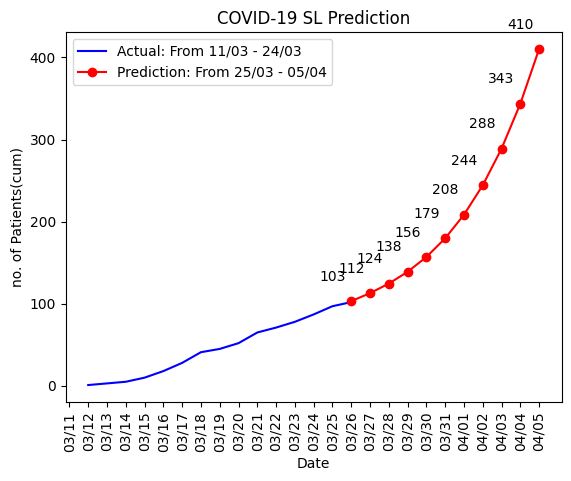

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111)

Dates=pd.date_range(start="2020-03-11",end="2020-04-05").strftime('%m/%d')

plt.plot(data,target,'b',label='Actual: From 11/03 - 24/03')
plt.plot(test_data,predicted_target_next_10_days,'r-o',label='Prediction: From 25/03 - 05/04')
plt.legend()
plt.xlabel('Date')
plt.ylabel('no. of Patients(cum)')
plt.xticks(range(0,len(Dates),1), Dates)
plt.xticks(rotation=90)
plt.title('COVID-19 SL Prediction')

for i, v in enumerate(predicted_target_next_10_days.reshape((predicted_target_next_10_days.shape[0]*predicted_target_next_10_days.shape[1]))):
    ax.text(i+14, v+25, "%d" %v, ha="center")

plt.savefig('Prediction.png')
plt.show()